The Coffee Cooling Problem <br>
Simulation 477 <br>
By Grant Smith and Leo Petersen <br>

Our step function takes in temprature, $T$, as input and uses the standard formulation of *Newton's Law of Cooling*: $$T(t + \Delta t) = T(t) - r(T - T_s) * \Delta t$$ in order to produce the temprature after a given amount of time, $\Delta$t or as we refer to in our code, *dt*. We choose to set all our variables at the start of every simulation and not as parameters to the function because unlike temprature, the step function has no affect on them thus passing them in as parameters only serves to change the readability, but we perfered the simplicity of a single input function instead. 

In [40]:
import matplotlib.pyplot as plt # This is for graphing later 

def step(T):
    return T - r * (T - Ts) * dt

We interpreted a "numerical solution" as a graph of Temprature vs Time until the Temprature of the coffee reaches the temprature of the enviroment, as we found that was the most useful structure for visualizing our results. The skeleton for our model is a while loop that continues until Temprature is less than some given value. We also precompute the time array for as a minor optimization, essentially using the range() function with a difference of *dt* between neighbors. Note that our lower bound must be greater than $T_s$, as our model converges (and thus never reaches) $T_s$, resulting in an infinite loop. This is a test using given parameters:

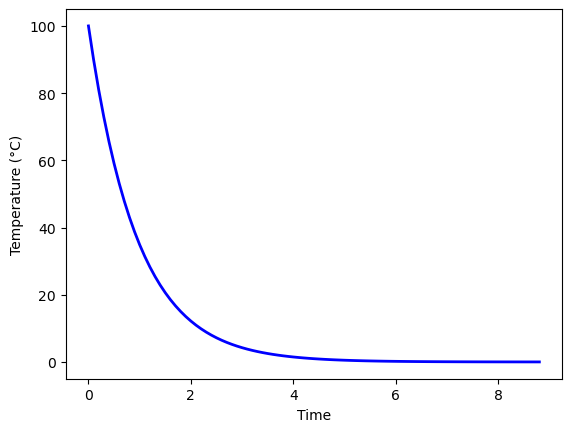

In [41]:
# Set parameters for part (a)
r = 1
Ts = 0
dt = 0.1
T0 = 100

# Run simulation, storing results in lists
temps = [T0]
T = T0

# Loop - end near Ts
while T > 0.01:
    T = step(T)
    temps.append(T)

times = [x * dt for x in range(len(temps))] # range(0, len(temps), dt)

# Plot temps and times
plt.plot(times, temps, 'b-', linewidth=2)
plt.ylabel('Temperature (°C)')
plt.xlabel('Time')
plt.show()


Since we know the change in temprature per minute, $\frac{dT}{dt}$ is equal to $r*(T-T_s)$, a term that represents temprature, we infer that the units of $r$ must be minutes$^{-1}$. Please note how the model suggests that the temprature of cooling coffee experiences exponential decay. We test our model again with different parameters and once again it suggests exponential decay: 

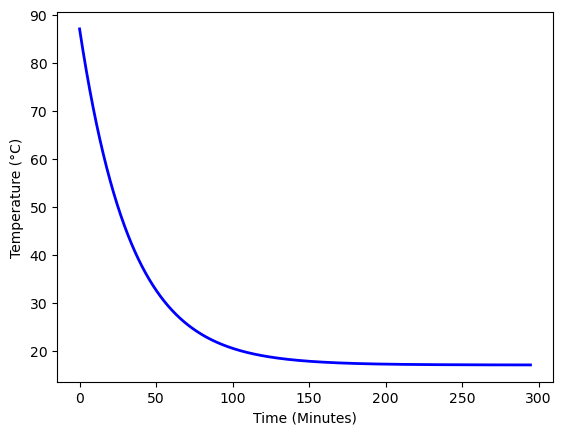

In [42]:
r = 0.03
Ts = 17
dt = 0.1
T0 = 87

temps = [T0]
T = T0

while T > Ts + 0.01:
    T = step(T)
    temps.append(T)

times = [x * dt for x in range(len(temps))]

plt.plot(times, temps, 'b-', linewidth=2)
plt.ylabel('Temperature (°C)')
plt.xlabel('Time (Minutes)')
plt.show()

Now we want to understand when we should add cream to coffee with the knowledge that adding the cream will lower the temprature of coffee by 5 degrees. To simulate the addition of cream at the start/end, we respectively subtract/add to the bounds instead, as adding cream is an action that takes effectively 0 time and is represented in a sharp drop in the graph. We first examine the effects of adding cream at the start to a model whose coffee temp starts at 87 (82 due to added cream).

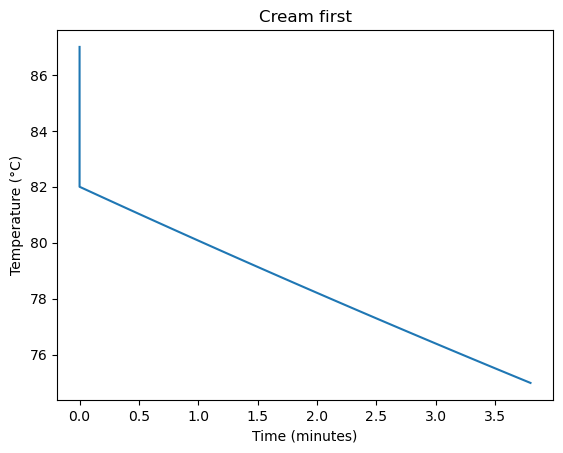

In [43]:
r = 0.03
Ts = 17
dt = 0.1
T0 = 87

# Add cream first (87 - 5 to 82), cool to 75
temps1 = [87, 82] # Start with initial temp after adding cream
T = 82
while T > 75:
    T = step(T)
    temps1.append(T)
times1 = [0] + [x * dt for x in range(len(temps1)-1)] # Extra 0 to account for added cream taking 0 time

# Plot cream first
#plt.figure()
plt.plot(times1, temps1, 'b-', linewidth=2)
plt.ylabel('Temperature (°C)')
plt.xlabel('Time (minutes)')
plt.title('Cream first')
plt.show()

Now, we examine how adding cream at the end fares. We add the cream at the last possible second, which is the same as adding 5 to the high bound (we stop early). Observe that the exponential decay is seemingly not present in this version of the model. To explain this we propose that since our loop stops at 80 but our model converges towards $T_s$ = 17, we are too far away and our presented range is too small for the exponential decay to be noticable. 

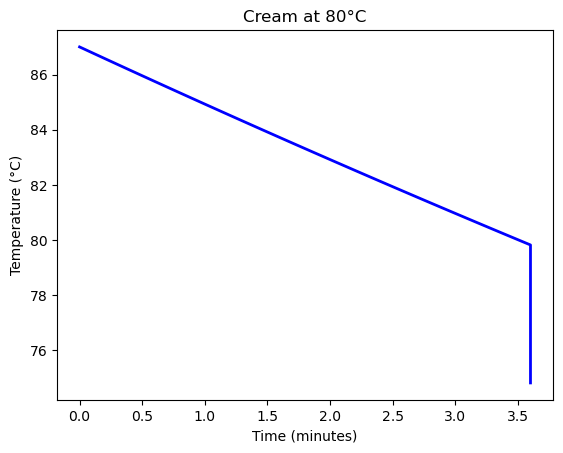


Cream first: 3.80 minutes
Cream at 80°C: 3.60 minutes
Cream at 80°C is faster by 0.20 minutes


In [44]:
temps2 = [87]
T = 87
while T > 80:
    T = step(T)
    temps2.append(T)
times2 = [x * dt for x in range(len(temps2))]

temps2.append(temps2[-1] - 5) # Add cream, temp drops by 5 degrees
times2.append(times2[-1])

plt.figure()
plt.plot(times2, temps2, 'b-', linewidth=2)
plt.ylabel('Temperature (°C)')
plt.xlabel('Time (minutes)')
plt.title('Cream at 80°C')
plt.show()

# Analysis
print(f"\nCream first: {times1[-1]:.2f} minutes")
print(f"Cream at 80°C: {times2[-1]:.2f} minutes")
print(f"Cream at 80°C is faster by {times1[-1] - times2[-1]:.2f} minutes")

In our results, we find that adding the cream at the end is fairly faster than adding the cream at the beginning